In [0]:
###################################################
# ラボワーク　ベースライン予測スクリプト
###################################################

In [3]:
# colab用のスクリプト
from google.colab import drive 
drive.mount('/content/drive')
%cd drive/My\ Drive/labowork

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/labowork


In [0]:
# import
import numpy as np
import pickle
import pandas as pd

In [0]:
# データの読み込み
X_test = np.load("./temp/preprocessed_test.npy")
test_indices = np.load("./temp/test_index.npy")

In [0]:
# modelの読み込み
with open("./model/basemodel.pkl", "rb") as f:
  model = pickle.load(f)

In [18]:
model.feature_importances_

array([0., 0., 0., ..., 0., 0., 0.])

In [0]:
with open("./temp/train_columns.csv", "r") as f:
  all_columns = pd.Index(f.readline().replace("\n", "").split(","))

In [0]:
importances = pd.Series(model.feature_importances_, index=all_columns)

(array([91.,  3.,  3.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.00062674, 0.00612337, 0.01161999, 0.01711661, 0.02261324,
        0.02810986, 0.03360649, 0.03910311, 0.04459974, 0.05009636,
        0.05559299, 0.06108961, 0.06658623, 0.07208286, 0.07757948,
        0.08307611, 0.08857273, 0.09406936, 0.09956598, 0.10506261,
        0.11055923, 0.11605585, 0.12155248, 0.1270491 , 0.13254573,
        0.13804235, 0.14353898, 0.1490356 , 0.15453222, 0.16002885,
        0.16552547, 0.1710

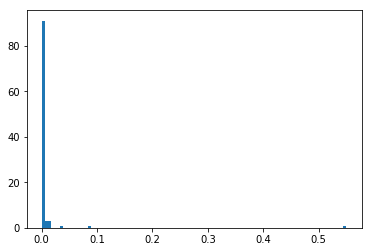

In [28]:
import matplotlib.pyplot as plt
plt.hist(importances.sort_values(ascending=False).values[:100], bins=100)

In [0]:
predict = model.predict(X_test)

In [0]:
res = pd.DataFrame(predict, index=test_indices)

In [0]:
res.to_csv("./res/baseline.csv", sep=",", header=False)